In [1]:
import sys
sys.path.append('../src')

from dotenv import load_dotenv
from openai import OpenAI
from IPython.display import Image
from protocol import Env
from agents import Group
from agent import Agent
from utilities.tools import web_search

### Task

 
[2024-12-17 11:30:25][INFO]: All agents are fully connected


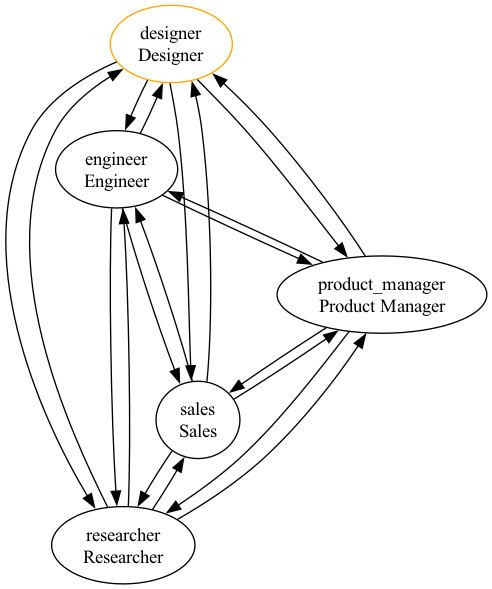

In [2]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="You are entrepreneurs building a new product. Now is December 2024",
    members=[
        Agent(name = "designer",
              role = "Designer", 
              description = "Transfer to me if you need help with design.",
              model_client = model_client,
              verbose = True),

        Agent(name="engineer",
              role="Engineer",
              description="Transfer to me if you need help with engineering.",
              model_client=model_client,                
              verbose=True),

        Agent(name="researcher",
                role="Researcher",
                description="Transfer to me if you need help with research.",
                model_client=model_client,
                tools=[web_search],
                verbose=True),

        Agent(name="sales",
                role="Sales",
                description="Transfer to me if you need help with sales.",
                model_client=model_client,
                tools=[web_search],
                verbose=True),

      Agent(name="product_manager",
                  role="Product Manager",
                  description="Transfer to me if you need help with product management.",
                  model_client=model_client,
                  verbose=True),
    ]
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)
Image(g.draw_relations())

In [3]:
_ = g.task("I want to build a simplistic and user-friendly bicycle in 2025, can you write a bussiness plan for me?",
           model="gpt-4o-mini",
           model_for_planning = "gpt-4o",
           strategy="auto")

 
[2024-12-17 10:59:43][INFO]: Group Planner initialized (used for planning and managing group tasks)
 
[2024-12-17 10:59:43][INFO]: Start planning the task
 
[2024-12-17 10:59:47][INFO]: Planning finished
 
[2024-12-17 10:59:47][INFO]: Task: I want to build a simplistic and user-friendly bicycle in 2025, can you write a bussiness plan for me?

Plan:
Step 1: researcher
Conduct market research on the current demand for bicycles, consumer preferences, and industry trends.
receive information from: []


Step 2: sales
Research potential distribution channels and potential retail partners for the bicycle.
receive information from: []


Step 3: designer
Design a simple, user-friendly bicycle prototype focusing on aesthetics and ergonomics.
receive information from: []


Step 4: engineer
Develop the technical specifications for the bicycle based on the designer's prototype.
receive information from: ['designer']


Step 5: product_manager
Consolidate information from research, sales potential,

### More Example

 
[2024-12-17 11:30:39][INFO]: All agents are fully connected


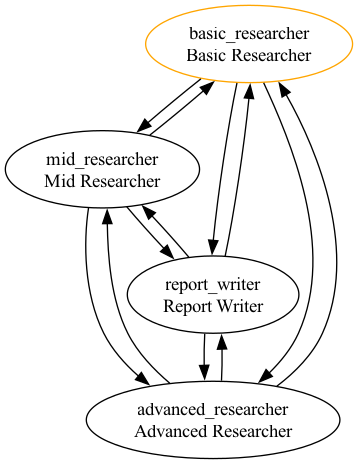

In [3]:
from utilities.tools import web_search
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="You are a group of researchers working on a project. Now is December 2024",
    members=[
        Agent(name="basic_researcher",
                role="Basic Researcher",
                description="Transfer to me if you need help with basic research.",
                persona="You are a basic researcher who can do basic research on any topic.",
                model_client=model_client,
                tools=[web_search],
                verbose=True),

        Agent(name="mid_researcher",
                role="Mid Researcher",
                description="Transfer to me if you have done some basic research and need help with mid-level research.",
                persona="You are a mid-level researcher who can do mid-level research on any topic.",
                model_client=model_client,
                tools=[web_search],
                verbose=True),

        Agent(name="advanced_researcher",
                role="Advanced Researcher",
                description="Transfer to me if you have done some mid-level research and need help with advanced research.",
                persona="You are an advanced researcher who can do advanced research on any topic.",
                model_client=model_client,
                tools=[web_search],
                verbose=True),

      Agent(name="report_writer",
                  role="Report Writer",
                  description="Transfer to me if you need help with writing reports.",
                  persona="You are a report writer who can write reports on any topic.",
                  model_client=model_client,
                  verbose=True),
    ]
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)
Image(g.draw_relations())

In [4]:
_ = g.task("write a report about LLM multi-agent systems focusing on the latest usges and applications.",
           model="gpt-4o-mini",
           model_for_planning = "gpt-4o-mini",
           strategy="auto")

 
[2024-12-17 11:30:40][INFO]: Group Planner initialized (used for planning and managing group tasks)
 
[2024-12-17 11:30:40][INFO]: Start planning the task
 
[2024-12-17 11:30:48][INFO]: Planning finished
 
[2024-12-17 11:30:48][INFO]: Task: write a report about LLM multi-agent systems focusing on the latest usges and applications.

Plan:
Step 1: advanced_researcher
Conduct in-depth research on the latest usages and applications of LLM multi-agent systems.
receive information from: []


Step 2: mid_researcher
Collect case studies and examples of LLM multi-agent systems in real-world applications.
receive information from: ['advanced_researcher']


Step 3: basic_researcher
Perform web searches to find recent publications and articles about LLM multi-agent systems.
receive information from: ['mid_researcher']


Step 4: report_writer
Compile the information gathered into a structured report on LLM multi-agent systems, highlighting the findings and trends.
receive information from: ['adva